In [3]:
import numpy as np
import pandas as pd

#plot
import matplotlib.pyplot as plt
import seaborn as sns

# dados
import kagglehub
from pathlib import Path
import zipfile


c:\Users\ander\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [39]:
def img_save(file_name):
    plt.savefig(f"../images/Anderson/{file_name}.png", dpi=300, bbox_inches='tight')
    plt.close()

In [4]:
path = kagglehub.dataset_download("vinayakshanawad/heart-rate-prediction-to-monitor-stress-level")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\ander\.cache\kagglehub\datasets\vinayakshanawad\heart-rate-prediction-to-monitor-stress-level\versions\1


In [5]:
p = Path(path)

train_path = p / "Train Data" / "Train Data Zip"

train_files = list(train_path.rglob("*.csv"))

train_nonL = [f for f in train_files if "non_linear" in f.name.lower()][0]
df_train_nonL = pd.read_csv(train_nonL)
train_time = [f for f in train_files if "time_domain" in f.name.lower()][0]
df_train_time = pd.read_csv(train_time)
train_freq = [f for f in train_files if "frequency_domain" in f.name.lower()][0]
df_train_freq = pd.read_csv(train_freq)
df_train_p1 = df_train_time.merge(df_train_freq, on='uuid', how='inner',validate='one_to_one')
df_train = df_train_p1.merge(df_train_nonL, on='uuid', how='inner',validate='one_to_one')


In [6]:
df = df_train.copy()

In [7]:
df.head(10)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,datasetId,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,2,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,2,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,2,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,2,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,2,no stress
5,923.283866,617.794160,517.536544,9.965976,9.933933,51.930344,81.342254,1.200000,0.600000,-0.893858,...,6.799829,3462.418453,13.706252,0.072959,7.026695,731.873468,0.582616,1.128483,2,no stress
6,973.252908,964.650020,82.405179,10.644196,10.643638,7.741794,62.095066,2.000000,0.000000,-0.442670,...,0.307425,1243.278879,324.282351,0.003084,7.528700,116.295081,2.161461,1.158004,2,no stress
7,715.914682,679.499395,131.477151,9.477727,9.477717,13.872224,85.857703,2.533333,0.200000,5.224736,...,6.194082,1925.601664,15.144441,0.066031,6.703994,185.815874,1.110739,1.146555,2,no stress
8,814.257021,827.522830,87.014459,14.632232,14.631275,5.946766,74.588857,7.733333,0.800000,-0.455008,...,2.026982,3148.992003,48.334430,0.020689,10.349326,122.621056,2.174233,1.122471,2,interruption
9,959.694591,957.895600,54.904529,12.015400,12.015343,4.569513,62.726998,3.266667,0.200000,0.413338,...,0.490102,1705.869787,203.039304,0.004925,8.498966,77.180192,2.171600,1.176054,2,no stress


1. Verificando presença de ausêntes (ja feita no eda)

In [8]:
df.isna().sum()

MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
uuid                 0
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
condition            0
dtype: int64

In [9]:
# removendo o que não trará variância
df.drop(['datasetId', 'uuid'], axis=1,inplace=True)
df.head()


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci,condition
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485,no stress
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711,interruption
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315,interruption
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688,no stress
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612,no stress


In [10]:
# removendo condition -> classificação e HR -> regressão
df_M = df.drop(['condition'], axis=1)
df_M.head(5)

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612


2. Lidando com variáveis altamente correlacionadas

In [11]:
threshold = 0.8
preditores = [i for i in df_M.columns]
removidos = []

In [12]:
corr = df_M[preditores].corr(numeric_only=True).abs()
#print(corr)

In [13]:
while True:
    np.fill_diagonal(corr.values, 0) # zera as diagonais
    trigSup = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool)) # trig superior

    # verificando se tem correlação maior que o limiar
    if trigSup.max().max() <= threshold:
        break

    # par mais correlacionado
    A, B = trigSup.stack().idxmax()

    # calculo da média de correlações, removendo com ele prórpio e com a outra escolhida
    mA = corr.loc[A, preditores].drop([A, B]).mean()
    mB = corr.loc[B, preditores].drop([A, B]).mean()

    # indicando remover o preditor com a maior média
    drop = A if mA >= mB else B

    # salvando a mudança
    valor_corr = corr.loc[A, B]
    removidos.append((drop, (A, B), (mA, mB), float(valor_corr)))

    # removendo
    preditores.remove(drop)
    corr = corr.drop(index=drop, columns=drop)
    

In [14]:
print(removidos)

[('SD1', ('SDSD', 'SD1'), (np.float64(0.3422573609946866), np.float64(0.34225736099468784)), 1.0000000000000102), ('LF_NU', ('LF_NU', 'HF_NU'), (np.float64(0.32782425388123904), np.float64(0.32782425388123687)), 1.000000000000001), ('KURT', ('KURT', 'KURT_REL_RR'), (np.float64(0.16027766292238527), np.float64(0.16027766292238527)), 1.0), ('SKEW', ('SKEW', 'SKEW_REL_RR'), (np.float64(0.17792288104243859), np.float64(0.17792288104243859)), 1.0), ('SDSD_REL_RR', ('RMSSD_REL_RR', 'SDSD_REL_RR'), (np.float64(0.3844391011901846), np.float64(0.384439109527182)), 0.9999999999572793), ('RMSSD', ('RMSSD', 'SDSD'), (np.float64(0.3314948532592896), np.float64(0.33149443601605594)), 0.9999998264707147), ('SDRR', ('SDRR', 'SD2'), (np.float64(0.3063268432803505), np.float64(0.3062212378678279)), 0.9999972215849535), ('HF_NU', ('HF_NU', 'HF_LF'), (np.float64(0.3189423625943335), np.float64(0.3100799863218089)), 0.9961753424035372), ('VLF_PCT', ('VLF_PCT', 'LF_PCT'), (np.float64(0.3429489611655992), np

In [15]:
df_M

,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,...,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF,SD1,SD2,sampen,higuci
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,...,15.522603,0.421047,1.514737,3686.666157,65.018055,0.015380,11.001565,199.061782,2.139754,1.163485
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,...,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055,9.170129,114.634458,2.174499,1.084711
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,...,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607,11.533417,118.939253,2.135350,1.176315
3,881.757865,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,...,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074,11.119476,127.318597,2.178341,1.179688
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,...,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912,13.590641,87.718281,2.221121,1.249612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369284,721.396910,721.533965,36.377559,9.609941,9.609936,3.785409,83.384647,0.933333,0.000000,1.007321,...,38.227175,5.886975,10.880317,649.351702,8.190908,0.122087,6.797519,50.994582,2.096850,1.314910
369285,984.266492,978.622945,74.918433,13.762274,13.761705,5.443754,61.314243,6.333333,0.200000,0.248964,...,2.573834,0.112964,0.357547,2278.456746,278.683532,0.003588,9.734243,105.502548,2.131264,1.175975
369286,1025.499743,1024.968400,95.309200,23.051254,23.050395,4.134664,59.028594,30.400000,2.066667,-0.429686,...,4.287216,0.098983,0.180070,4331.259564,554.340761,0.001804,16.304530,133.797793,2.215643,1.140232
369287,798.123167,803.559610,78.449897,16.736686,16.736657,4.687302,75.978628,10.000000,1.466667,0.600389,...,46.636158,1.591647,3.522995,2930.056129,27.384942,0.036516,11.838553,110.311474,2.091628,1.181937


In [16]:
for a,b,c,d in removidos:
    print(a, end=' - ')
    if a != 'HR':
        df_M.drop([a], axis = 1, inplace=True)
        print('removido')
    else: print('não')

SD1 - removido
LF_NU - removido
KURT - removido
SKEW - removido
SDSD_REL_RR - removido
RMSSD - removido
SDRR - removido
HF_NU - removido
VLF_PCT - removido
MEAN_RR - removido
TP - removido
SDSD - removido
HR - não
pNN25 - removido
SD2 - removido
RMSSD_REL_RR - removido
HF_PCT - removido


In [17]:
df_M.shape

(369289, 18)

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
# padronizando e escalonando
scaler = StandardScaler(with_mean=True, with_std=True)
Z = scaler.fit_transform(df_M)
print(Z.mean(), Z.std())

2.073734042345327e-17 1.0


In [20]:
print(Z)

[[ 0.08916087  0.32399012 -0.42968783 ... -0.67275865  0.37334785
  -0.30240555]
 [ 0.80404558 -0.21855867 -0.92660027 ... -0.92307306  0.54119807
  -1.56903886]
 [ 0.49153993 -0.43049566 -0.62798515 ... -0.76971081  0.35207093
  -0.09611535]
 ...
 [ 1.38302122 -0.63414497 -1.44264252 ... -0.94848808  0.73996194
  -0.67629604]
 [-0.29025121 -0.52670801  0.19703182 ... -0.24349624  0.1408559
  -0.00571249]
 [-0.20244055 -0.8006104   0.02477217 ... -0.26188235  0.70397363
   0.83281311]]


In [21]:
Cov = pd.DataFrame(Z, columns=df_M.columns).cov()
print(Cov)

                   MEDIAN_RR  SDRR_RMSSD        HR     pNN50  MEAN_REL_RR  \
MEDIAN_RR           1.000003    0.203816 -0.929642  0.196993    -0.018019   
SDRR_RMSSD          0.203816    1.000003 -0.084333  0.187629     0.014104   
HR                 -0.929642   -0.084333  1.000003 -0.114896     0.017776   
pNN50               0.196993    0.187629 -0.114896  1.000003    -0.039165   
MEAN_REL_RR        -0.018019    0.014104  0.017776 -0.039165     1.000003   
MEDIAN_REL_RR      -0.006349    0.300670  0.054649 -0.190604     0.134923   
SDRR_REL_RR        -0.157427   -0.048227  0.234558  0.756255    -0.013210   
SDRR_RMSSD_REL_RR   0.635820    0.078020 -0.675556  0.012339    -0.035138   
KURT_REL_RR        -0.284508   -0.029829  0.303672 -0.064264     0.045365   
SKEW_REL_RR        -0.317131    0.313449  0.306403  0.088570     0.010727   
VLF                 0.399024    0.617611 -0.304569  0.529804    -0.026638   
LF                  0.084147   -0.276739 -0.097228  0.670074    -0.022014   

In [22]:
vals, vecs = np.linalg.eigh(Cov)              # C é simétrica → eigh
order = np.argsort(vals)[::-1]              # ordem decrescente
vals = vals[order]
vecs = vecs[:, order]

In [23]:
print(vals, vecs, sep="\n\n")

[4.98861759 3.6333034  3.03171533 1.28223341 1.02991396 0.88908228
 0.74111843 0.67750075 0.48936615 0.40476304 0.23046089 0.16592233
 0.13797631 0.11098162 0.0618073  0.05521962 0.04097525 0.02909108]

[[-3.75849267e-01 -1.04489962e-01 -1.04957844e-01 -1.13703044e-01
  -6.73110952e-02  1.68272322e-01 -3.58325207e-01 -1.45243853e-01
  -1.26656801e-01  5.15091907e-03 -3.27877832e-01  1.49843876e-02
  -3.26244562e-01 -7.09945948e-02  2.99755954e-01  8.50456380e-02
  -5.42398037e-01 -1.22396502e-01]
 [-1.27553414e-01  3.69543759e-01 -2.16502564e-01 -1.15831540e-01
   9.69953811e-02 -1.69363489e-01 -3.28422587e-01  3.59834008e-01
   1.79818226e-01 -4.64378111e-02 -4.46646892e-02  6.82098043e-02
  -4.22333699e-01  5.31476866e-02 -5.24294863e-01  7.36077270e-02
   9.37739731e-02  4.17867507e-03]
 [ 3.83638395e-01  1.47064375e-01  4.54301139e-02  4.07707867e-02
   5.58308958e-02 -1.05706016e-01  3.38573950e-01  1.49195604e-01
   2.22436375e-01  8.65957335e-02  2.31849591e-01  6.87528313e-02
 

In [24]:
(vals[0]+vals[1])/vals.sum() * 100

np.float64(47.89943131217967)

scree plot

[0.27714467 0.20184964 0.16842817 0.071235   0.05721729 0.04939333
 0.04117313 0.03763883 0.02718693 0.02248677 0.01280335 0.00921788
 0.00766533 0.00616563 0.00343373 0.00306775 0.0022764  0.00161617]


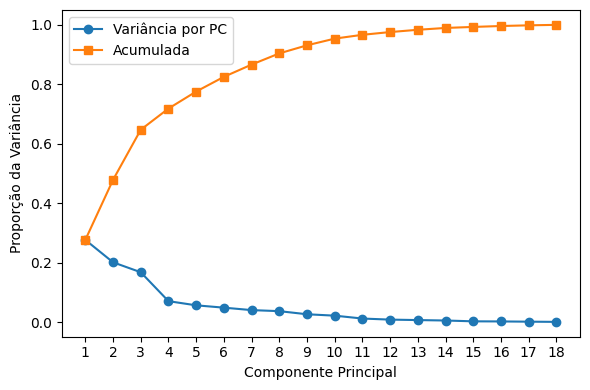

In [25]:
var = vals / vals.sum()
print(var)
var_cum = np.cumsum(var)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(var)+1), var, marker='o', label='Variância por PC')
plt.plot(range(1, len(var)+1), var_cum, marker='s', label='Acumulada')
plt.xlabel('Componente Principal'); plt.ylabel('Proporção da Variância')
plt.xticks(range(1, len(var)+1))
plt.legend(); plt.tight_layout(); plt.show()

biplot

In [26]:
Z_pca = Z @ vecs[:, :2]
pca_df = pd.DataFrame(Z_pca, columns=['PC1', 'PC2'])
#pca_df['condition'] = df['condition'].values

In [27]:
import mpl_axes_aligner
import matplotlib.patheffects as pe

In [40]:
#Fonte: https://insidelearningmachines.com/biplot/#:~:text=We%20can%20make%20a%20biplot%20in%20Python%20that,%23set%20x-axis%20label%20ax.set_xlabel%28%22PC1%22%2Cfontsize%3D10%29%20%23set%20y-axis%20label%20

def biplot(dfScores, dfLoadings, y, k_loadings=8):
    # --- Cores fixas das classes
    palette = {'no stress': '#1f77b4', 'interruption': '#ff7f0e', 'time pressure': '#2ca02c'}
    markers = {'no stress': 'o', 'interruption': 's', 'time pressure': '^'}

    fig, ax = plt.subplots(figsize=(12, 7))

    # --- Pontos (scores)
    y = pd.Series(y).astype(str).values
    for c in pd.unique(y):
        m = (y == c)
        ax.scatter(dfScores.loc[m, 'PC1'], dfScores.loc[m, 'PC2'],
                   s=8, alpha=0.55, c=[palette.get(c, 'grey')], marker=markers.get(c, 'o'),
                   label=c)

    ax.set_xlabel('PC1'); ax.set_ylabel('PC2')
    ax.legend(title='Condition', frameon=False, loc='upper left', bbox_to_anchor=(1.02, 1.02))
    ax.grid(alpha=0.15)

    # --- Seleção dos loadings mais fortes
    L = dfLoadings.loc[['PC1','PC2']].copy()
    strength = np.sqrt(L.loc['PC1']**2 + L.loc['PC2']**2)
    cols = strength.sort_values(ascending=False).head(k_loadings).index

    # --- Escala dos vetores para caber no painel
    # raio ~ 0.9 do alcance dos scores
    xspan = np.ptp(dfScores['PC1']); yspan = np.ptp(dfScores['PC2'])
    radius = 0.9 * min(xspan, yspan) / 2
    scale = radius / strength[cols].max()

    # --- Eixos para setas
    ax2 = ax.twinx().twiny()

    for col in cols:
        x = L.loc['PC1', col] * scale
        yv = L.loc['PC2', col] * scale
        ax2.arrow(0, 0, x, yv,
                  color='#555', lw=1.5, alpha=0.8, length_includes_head=True,
                  head_width=0.06*radius*0.1, head_length=0.09*radius*0.1, zorder=3)
        ax2.text(x*1.06, yv*1.06, col,
                 fontsize=9, color='black', ha='center', va='center',
                 bbox=dict(facecolor='white', edgecolor='none', alpha=0.6),
                 zorder=4)

    # alinhar eixos
    mpl_axes_aligner.align.xaxes(ax, 0, ax2, 0, 0.5)
    mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.5)

    plt.tight_layout()
    img_save('biplot_pca_2variaveis')



In [29]:
dfScores   = pd.DataFrame(Z_pca,columns=['PC'+str(i) for i in range(1,3)])
dfLoadings = pd.DataFrame(vecs[:, :2].T, columns=df_M.columns, index=dfScores.columns) 

In [30]:
dfLoadings

,MEDIAN_RR,SDRR_RMSSD,HR,pNN50,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,VLF,LF,LF_PCT,HF,LF_HF,HF_LF,sampen,higuci
PC1,-0.375849,-0.127553,0.383638,0.013572,0.012967,-0.083082,0.196872,-0.378982,0.125375,0.092230,-0.193233,0.058431,0.197578,0.351833,-0.197744,0.345781,-0.076896,0.336549
PC2,-0.104490,0.369544,0.147064,-0.073272,0.038122,0.336498,-0.156925,-0.078997,0.207814,0.282975,0.226815,-0.346754,-0.410958,0.007311,-0.090372,0.186858,-0.397144,-0.123620


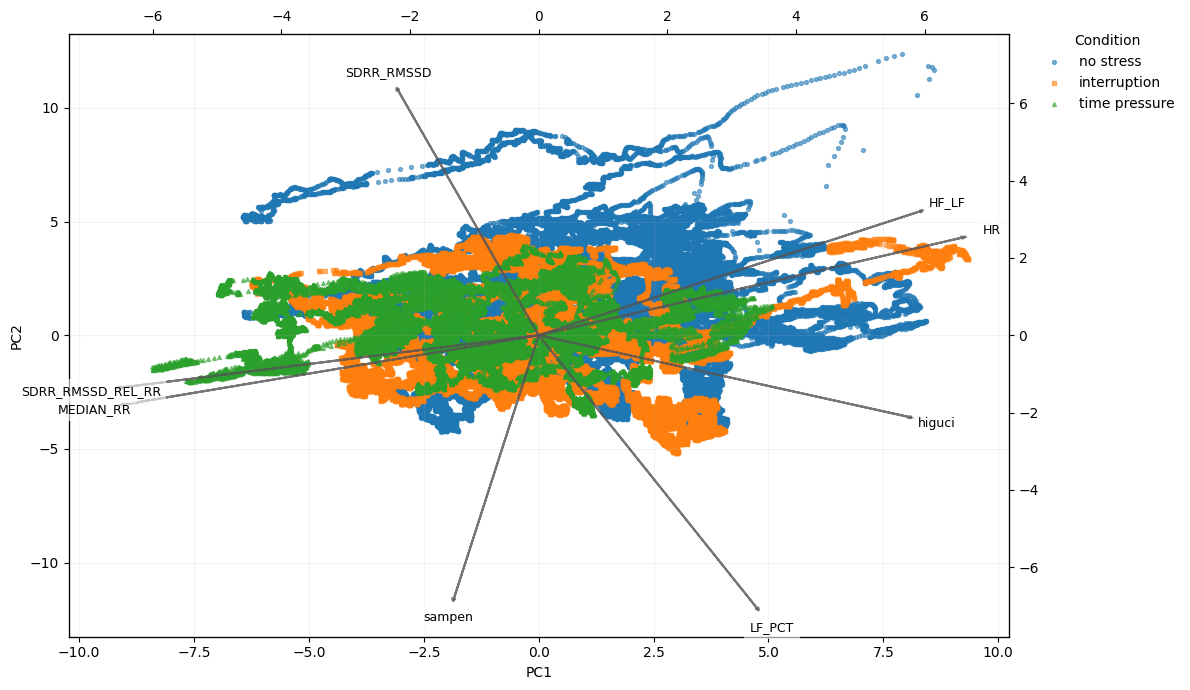

In [31]:
biplot(dfScores, dfLoadings, y = df['condition'],)

# com preditores escolhidos:

In [32]:
variaveis = [
    "HR",
    "TP",
    "SD2",
    "HF",
    "LF",
    "VLF_PCT",
    "MEDIAN_RR",
    "RMSSD",
    "SDRR_RMSSD_REL_RR",
    "HF_LF",
    "SDRR_REL_RR",
    "SDSD_REL_RR"
]


In [33]:
df_M2 = df.copy()
for i in df.columns:
    if i not in variaveis:
        df_M2.drop([i], axis=1, inplace=True)


In [34]:
df_M2.shape

(369289, 12)

In [35]:
# padronizando e escalonando
scaler = StandardScaler(with_mean=True, with_std=True)
Z2 = scaler.fit_transform(df_M2)

[0.40524966 0.30677376 0.16985142 0.04483283 0.02973602 0.01825214
 0.00898792 0.0058877  0.00458049 0.00399524 0.00113116 0.00072167]


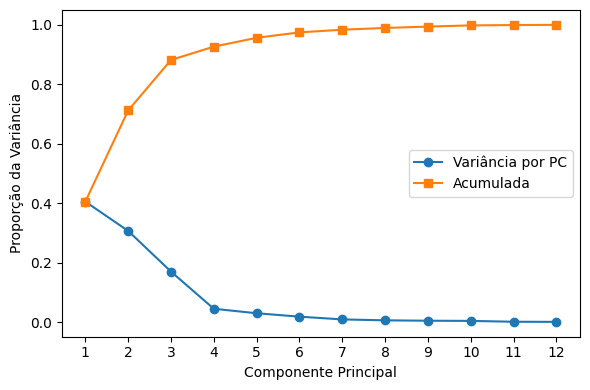

In [36]:
Cov = pd.DataFrame(Z2, columns=df_M2.columns).cov()
vals, vecs = np.linalg.eigh(Cov)              # C é simétrica → eigh
order = np.argsort(vals)[::-1]              # ordem decrescente
vals = vals[order]
vecs = vecs[:, order]


var = vals / vals.sum()
print(var)
var_cum = np.cumsum(var)

plt.figure(figsize=(6,4))
plt.plot(range(1, len(var)+1), var, marker='o', label='Variância por PC')
plt.plot(range(1, len(var)+1), var_cum, marker='s', label='Acumulada')
plt.xlabel('Componente Principal'); plt.ylabel('Proporção da Variância')
plt.xticks(range(1, len(var)+1))
plt.legend(); plt.tight_layout(); plt.show()

In [41]:
Z2_pca = Z2 @ vecs[:, :2]
pca_df = pd.DataFrame(Z2_pca, columns=['PC1', 'PC2'])
#pca_df['condition'] = df['condition'].values
dfScores   = pd.DataFrame(Z2_pca,columns=['PC'+str(i) for i in range(1,3)])
dfLoadings = pd.DataFrame(vecs[:, :2].T, columns=df_M2.columns, index=dfScores.columns) 
biplot(dfScores, dfLoadings, y = df['condition'], k_loadings=10)
print(dfLoadings)

     MEDIAN_RR     RMSSD        HR  SDRR_REL_RR  SDSD_REL_RR  \
PC1  -0.308501  0.155902  0.337219     0.342227     0.418855   
PC2  -0.302500 -0.468787  0.275657    -0.333284    -0.163290   

     SDRR_RMSSD_REL_RR   VLF_PCT        LF        HF        TP     HF_LF  \
PC1          -0.333579 -0.215174  0.184423  0.418867 -0.005570  0.325451   
PC2          -0.207935 -0.026807 -0.375777 -0.034962 -0.416464  0.203116   

          SD2  
PC1 -0.035502  
PC2 -0.271881  


                   MEDIAN_RR     RMSSD        HR  SDRR_REL_RR  SDSD_REL_RR  \
MEDIAN_RR           1.000000  0.309061 -0.929640    -0.157426    -0.401170   
RMSSD               0.309061  1.000000 -0.284871     0.836688     0.583894   
HR                 -0.929640 -0.284871  1.000000     0.234557     0.499867   
SDRR_REL_RR        -0.157426  0.836688  0.234557     1.000000     0.899460   
SDSD_REL_RR        -0.401170  0.583894  0.499867     0.899460     1.000000   
SDRR_RMSSD_REL_RR   0.635819  0.102232 -0.675554    -0.266828    -0.613551   
VLF_PCT             0.313607 -0.278834 -0.254543    -0.343214    -0.333824   
LF                  0.084147  0.886955 -0.097228     0.783464     0.524337   
HF                 -0.550244  0.332323  0.647427     0.732687     0.883735   
TP                  0.388862  0.595021 -0.301295     0.480078     0.260477   
HF_LF              -0.602190 -0.163887  0.701864     0.257943     0.585324   
SD2                 0.333450  0.260933 -0.202003     0.235116   

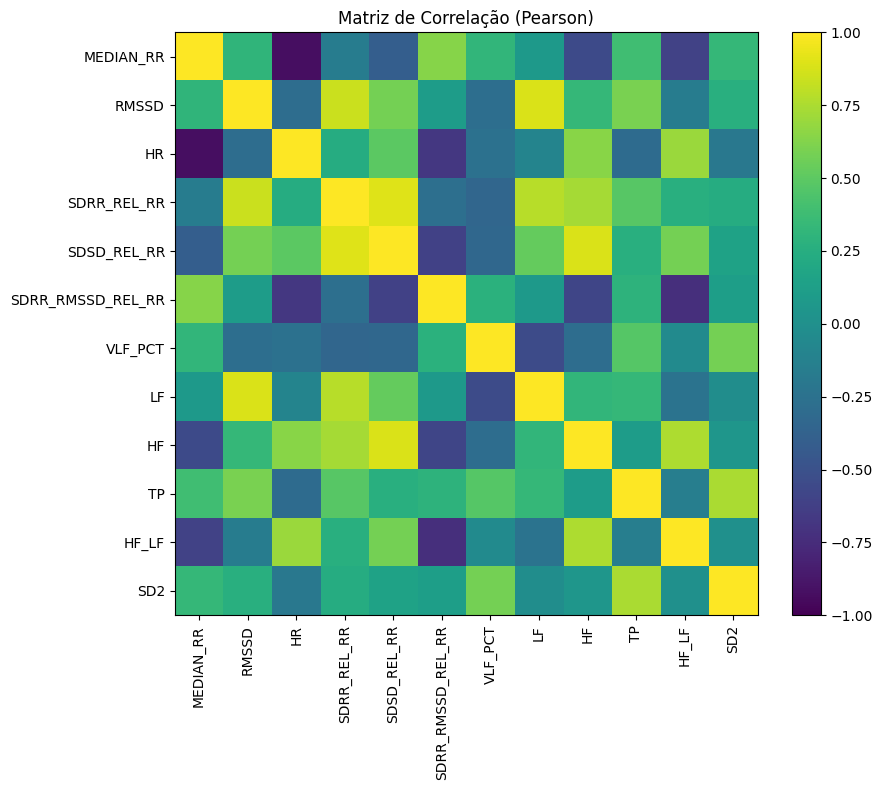

In [ ]:
num_cols = df_M2.select_dtypes(include='number').columns
corr = df_M2[num_cols].corr()
print(corr)

plt.figure(figsize=(10,8))
im = plt.imshow(corr.values, vmin=-1, vmax=1)
plt.colorbar(im, fraction=0.046, pad=0.04)
plt.xticks(range(len(num_cols)), num_cols, rotation=90)
plt.yticks(range(len(num_cols)), num_cols)
plt.title('Matriz de Correlação (Pearson)')
plt.tight_layout(); 
plt.show()

Classes: ['interruption', 'no stress', 'time pressure']
condition
interruption     105150
no stress        200082
time pressure     64057
dtype: int64

Classe: interruption
  n: 105150
  median: 0.00897841393767385
  mean: 0.010269646590688016
  IQR: 0.005117937468928226
  p10: 0.00642356321595265
  p25: 0.007361833644587075
  p50: 0.00897841393767385
  p75: 0.0124797711135153
  p90: 0.01637190635168694
  skewness: 1.1768447543742224
  kurtosis: 4.409253638130624

Classe: no stress
  n: 200082
  median: 0.00878294484912615
  mean: 0.009833757050830413
  IQR: 0.004545540223289075
  p10: 0.00586079312337628
  p25: 0.00694935927305405
  p50: 0.00878294484912615
  p75: 0.011494899496343126
  p90: 0.01636052579439161
  skewness: 1.2432480055650805
  kurtosis: 4.082384170143201

Classe: time pressure
  n: 64057
  median: 0.0079365023715679
  mean: 0.008355622327893487
  IQR: 0.0035319701822554995
  p10: 0.00489980998388532
  p25: 0.0062955348063004
  p50: 0.0079365023715679
  p75: 0.00982750

C:\Users\ander\AppData\Local\Temp\ipykernel_30816\2423322539.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(group_col).size())


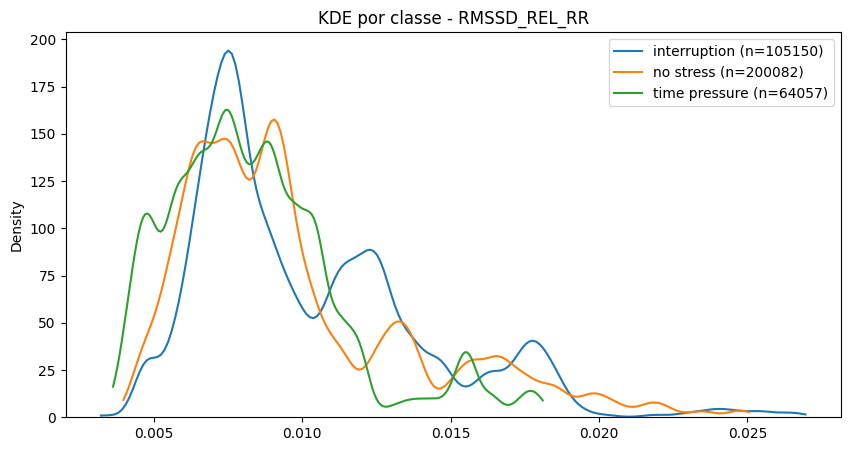

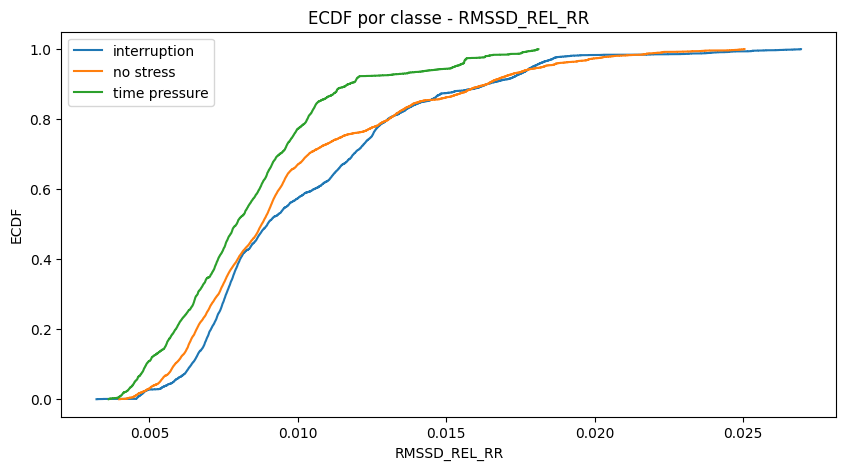

C:\Users\ander\AppData\Local\Temp\ipykernel_30816\2423322539.py:111: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=group_col, y=col, data=df, inner=None, scale='width')


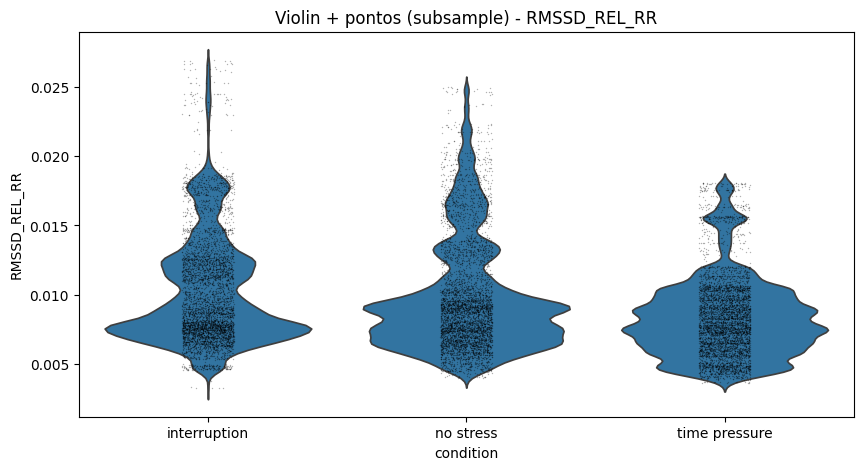

<Figure size 600x400 with 0 Axes>

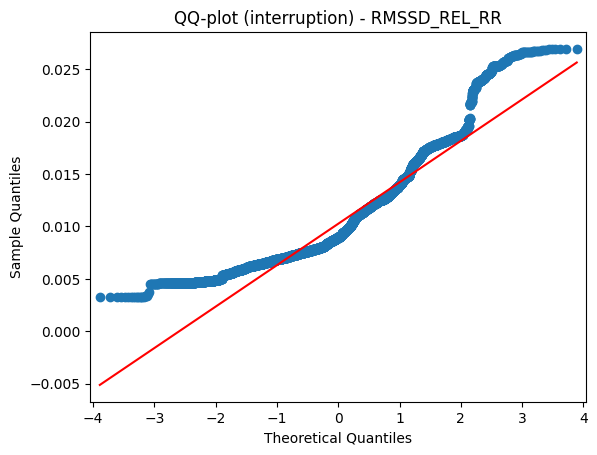

<Figure size 600x400 with 0 Axes>

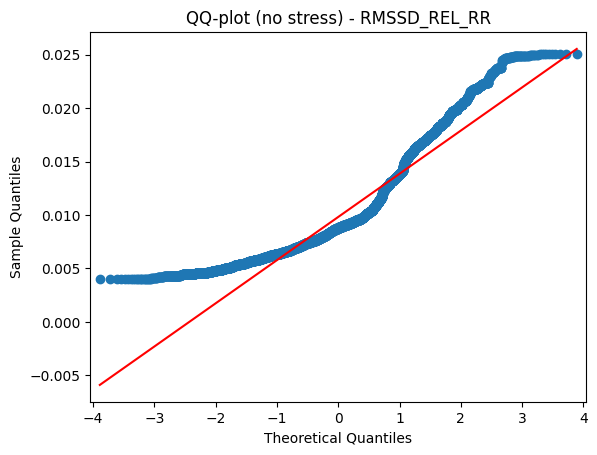

<Figure size 600x400 with 0 Axes>

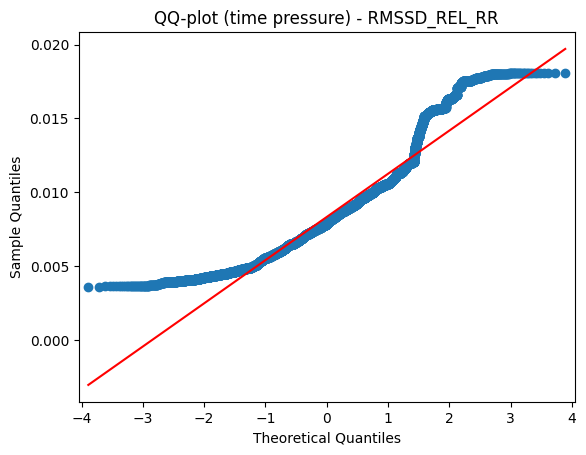


Levene (Brown-Forsythe) stat=2149.9670, p=0
Kruskal-Wallis stat=9439.7131, p=0
Dunn post-hoc (fdr_bh):
               interruption  no stress  time pressure
interruption            1.0        0.0            0.0
no stress               0.0        1.0            0.0
time pressure           0.0        0.0            1.0

Pairwise KS (forma de distribuição):
KS interruption vs no stress: stat=0.1107, p=0 (usando amostragem para KS)
KS interruption vs time pressure: stat=0.2440, p=0 (usando amostragem para KS)
KS no stress vs time pressure: stat=0.1604, p=0 (usando amostragem para KS)

Cliff's delta (pairwise):
Cliff's delta interruption vs no stress: 0.0868 (amostrado n=50000×50000)
Cliff's delta interruption vs time pressure: 0.2851
Cliff's delta no stress vs time pressure: 0.1935 (amostrado n=50000×50000)
{'interruption': {'n': 105150, 'median': np.float64(0.00897841393767385), 'mean': np.float64(0.010269646590688016), 'IQR': np.float64(0.005117937468928226), 'p10': np.float64(0.0064235

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import scikit_posthocs as sp
import statsmodels.api as sm

# ---- Função eficiente para Cliff's delta (exata) ----
def cliff_delta_efficient(x, y):
    """
    Calcula Cliff's delta sem criar a matriz outer.
    delta = (count(x>y) - count(x<y)) / (n_x * n_y)
    Complexidade: O(n_x * log(n_y)) (ou O(n log n) se sortarmos ambos e iterarmos).
    """
    x = np.asarray(x)
    y = np.asarray(y)
    if x.size == 0 or y.size == 0:
        return np.nan
    # ordenar y para searchsorted
    y_sorted = np.sort(y)
    n_y = y_sorted.size

    # para cada x, conta quantos y < x (less) e quantos y > x (greater)
    # less: index do left insertion point
    left_idx = np.searchsorted(y_sorted, x, side='left')    # número de y < x
    right_idx = np.searchsorted(y_sorted, x, side='right')  # número de y <= x
    less_counts = left_idx
    greater_counts = n_y - right_idx

    sum_less = less_counts.sum()
    sum_greater = greater_counts.sum()
    delta = (sum_less - sum_greater) / (x.size * n_y)
    return delta

# ---- Função principal (com melhorias) ----
def analyze_rmssd_rel_rr_efficient(
    df, col='RMSSD_REL_RR', group_col='condition',
    save_plots=False, out_prefix='rmssd_rel_rr',
    plot_sample=5000, calc_cliff_sample_threshold=200000,
    cliff_sample_size=50000
):
    """
    Versão do analisador com:
    - cliff_delta eficiente
    - subamostragem para plots (evita stripplot massivo)
    - opção de amostrar para Cliff's delta quando amostras enormes (para economizar tempo)
    """
    df = df[[col, group_col]].dropna().copy()
    df[group_col] = df[group_col].astype('category')
    groups = df[group_col].cat.categories.tolist()
    print(f"Classes: {groups}")
    print(df.groupby(group_col).size())

    # Estatísticas robustas por classe
    stats_summary = {}
    for g in groups:
        vals = df.loc[df[group_col]==g, col].values
        summary = {
            'n': len(vals),
            'median': np.median(vals),
            'mean': np.mean(vals),
            'IQR': np.percentile(vals, 75) - np.percentile(vals, 25),
            'p10': np.percentile(vals, 10),
            'p25': np.percentile(vals, 25),
            'p50': np.percentile(vals, 50),
            'p75': np.percentile(vals, 75),
            'p90': np.percentile(vals, 90),
            'skewness': stats.skew(vals, bias=False),
            'kurtosis': stats.kurtosis(vals, fisher=False, bias=False)
        }
        stats_summary[g] = summary
        print(f"\nClasse: {g}")
        for k,v in summary.items():
            print(f"  {k}: {v}")

    # ---- Plots (com subamostragem para pontos) ----
    # KDE por classe (sem plotar todos os pontos)
    plt.figure(figsize=(10,5))
    for g in groups:
        vals = df.loc[df[group_col]==g, col].values
        sns.kdeplot(vals, label=f"{g} (n={len(vals)})", bw_method='scott', cut=0)
    plt.title(f"KDE por classe - {col}")
    plt.legend()
    if save_plots: plt.savefig(f"{out_prefix}_kde.png", dpi=150)
    plt.show()

    # ECDF por classe (plota ECDF usando subamostragem se necessário)
    plt.figure(figsize=(10,5))
    for g in groups:
        vals = np.sort(df.loc[df[group_col]==g, col].values)
        if vals.size > plot_sample:
            # reduzir via índices percentílicos para representar ECDF sem plotar tudo
            idx = np.linspace(0, vals.size-1, plot_sample).astype(int)
            vals_small = vals[idx]
            y = np.linspace(0, 1, vals_small.size)
            plt.step(vals_small, y, where='post', label=g)
        else:
            x, y = np.arange(1, vals.size+1)/vals.size, vals
            # para manter ordem correta:
            plt.step(vals, np.arange(1, vals.size+1)/vals.size, where='post', label=g)
    plt.xlabel(col)
    plt.ylabel('ECDF')
    plt.title(f"ECDF por classe - {col}")
    plt.legend()
    if save_plots: plt.savefig(f"{out_prefix}_ecdf.png", dpi=150)
    plt.show()

    # Violin + stripplot (strip com subamostra)
    plt.figure(figsize=(10,5))
    sns.violinplot(x=group_col, y=col, data=df, inner=None, scale='width')
    # strip (subsample)
    subs = []
    for g in groups:
        vals = df.loc[df[group_col]==g, col]
        if vals.size > plot_sample:
            subs.append(vals.sample(plot_sample, random_state=0))
        else:
            subs.append(vals)
    subs_df = pd.concat([pd.DataFrame({col: s, group_col: g}) for s, g in zip(subs, groups)], ignore_index=True)
    sns.stripplot(x=group_col, y=col, data=subs_df, color='k', size=1, alpha=0.3)
    plt.title(f"Violin + pontos (subsample) - {col}")
    if save_plots: plt.savefig(f"{out_prefix}_violin.png", dpi=150)
    plt.show()

    # QQ plots por classe (pode ser caro se N enorme - amostre para QQ)
    for g in groups:
        vals = df.loc[df[group_col]==g, col].values
        plt.figure(figsize=(6,4))
        n_qq = min(vals.size, 20000)  # evitar plot gigante
        if vals.size > n_qq:
            vals_sample = np.random.RandomState(0).choice(vals, n_qq, replace=False)
        else:
            vals_sample = vals
        sm.qqplot(vals_sample, line='s')
        plt.title(f"QQ-plot ({g}) - {col}")
        if save_plots: plt.savefig(f"{out_prefix}_qq_{g}.png", dpi=150)
        plt.show()

    # ---- Testes estatísticos ----
    group_vals = [df.loc[df[group_col]==g, col].values for g in groups]
    lev_stat, lev_p = stats.levene(*group_vals, center='median')
    print(f"\nLevene (Brown-Forsythe) stat={lev_stat:.4f}, p={lev_p:.4g}")

    kw_stat, kw_p = stats.kruskal(*group_vals)
    print(f"Kruskal-Wallis stat={kw_stat:.4f}, p={kw_p:.4g}")

    if kw_p < 0.05:
        print("Dunn post-hoc (fdr_bh):")
        post = sp.posthoc_dunn(df, val_col=col, group_col=group_col, p_adjust='fdr_bh')
        print(post)
    else:
        print("Kruskal não significativo — pular Dunn")

    # ---- Pairwise KS (cuidado com N grande; aqui executa mas pode demorar) ----
    print("\nPairwise KS (forma de distribuição):")
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            g1, g2 = groups[i], groups[j]
            v1 = df.loc[df[group_col]==g1, col].values
            v2 = df.loc[df[group_col]==g2, col].values
            # opcional: amostrar se muito grande para acelerar KS
            max_for_ks = 200000
            if v1.size * v2.size > 1e8:  # heurística para evitar blow-up de tempo
                v1s = np.random.RandomState(1).choice(v1, min(v1.size, max_for_ks), replace=False)
                v2s = np.random.RandomState(2).choice(v2, min(v2.size, max_for_ks), replace=False)
                ks_stat, ks_p = stats.ks_2samp(v1s, v2s)
                note = " (usando amostragem para KS)"
            else:
                ks_stat, ks_p = stats.ks_2samp(v1, v2)
                note = ""
            print(f"KS {g1} vs {g2}: stat={ks_stat:.4f}, p={ks_p:.4g}{note}")

    # ---- Cliff's delta (efetivo) pairwise, com amostragem se necessário ----
    print("\nCliff's delta (pairwise):")
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            g1, g2 = groups[i], groups[j]
            v1 = df.loc[df[group_col]==g1, col].values
            v2 = df.loc[df[group_col]==g2, col].values

            # se muito grande, amostrar para economizar tempo (mantém precisão razoável)
            if max(v1.size, v2.size) > calc_cliff_sample_threshold:
                v1s = np.random.RandomState(10).choice(v1, min(v1.size, cliff_sample_size), replace=False)
                v2s = np.random.RandomState(11).choice(v2, min(v2.size, cliff_sample_size), replace=False)
                delta = cliff_delta_efficient(v1s, v2s)
                note = f" (amostrado n={len(v1s)}×{len(v2s)})"
            else:
                delta = cliff_delta_efficient(v1, v2)
                note = ""
            print(f"Cliff's delta {g1} vs {g2}: {delta:.4f}{note}")

    return {
        'summary': stats_summary,
        'levene': (lev_stat, lev_p),
        'kruskal': (kw_stat, kw_p),
    }

# Exemplo de uso:
resultado = analyze_rmssd_rel_rr_efficient(df, col='RMSSD_REL_RR', group_col='condition', save_plots=False)
print(resultado['summary'])
